In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7b9a601cdf6b4126931391762db06a57


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | dawson creek
Processing Record 3 of Set 1 | mandalgovi
Processing Record 4 of Set 1 | gorontalo
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | baykit
Processing Record 9 of Set 1 | pangody
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | kudahuvadhoo
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | albany
Proc

Processing Record 35 of Set 4 | krasnoselkup
Processing Record 36 of Set 4 | charters towers
Processing Record 37 of Set 4 | qui nhon
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | chudovo
Processing Record 40 of Set 4 | manta
Processing Record 41 of Set 4 | pahrump
Processing Record 42 of Set 4 | halifax
Processing Record 43 of Set 4 | benguela
Processing Record 44 of Set 4 | coxim
Processing Record 45 of Set 4 | kyra
Processing Record 46 of Set 4 | maningrida
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | phibun mangsahan
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | abalak
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | lenger
Processing Record 3 of Set 5 | penzance
Processing Record 4 of Set 5 | tam ky
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | bubaque
Processing Record 8 of S

Processing Record 24 of Set 8 | ugoofaaru
Processing Record 25 of Set 8 | waddan
Processing Record 26 of Set 8 | comodoro rivadavia
Processing Record 27 of Set 8 | khani
Processing Record 28 of Set 8 | coahuayana
Processing Record 29 of Set 8 | holbeach
Processing Record 30 of Set 8 | dover
Processing Record 31 of Set 8 | kedougou
Processing Record 32 of Set 8 | sao domingos
Processing Record 33 of Set 8 | bengkalis
City not found. Skipping...
Processing Record 34 of Set 8 | olafsvik
Processing Record 35 of Set 8 | balimo
City not found. Skipping...
Processing Record 36 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 8 | kahului
Processing Record 38 of Set 8 | jiuquan
Processing Record 39 of Set 8 | bonfim
Processing Record 40 of Set 8 | rennes
Processing Record 41 of Set 8 | moindou
Processing Record 42 of Set 8 | lamar
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | kirovsk
Processing Record 45 of Set 8 | amarillo
Processing Record 46 of Se

Processing Record 9 of Set 12 | koumac
Processing Record 10 of Set 12 | kostomuksha
Processing Record 11 of Set 12 | chopovychi
Processing Record 12 of Set 12 | chernyshevskiy
Processing Record 13 of Set 12 | rawson
Processing Record 14 of Set 12 | florianopolis
Processing Record 15 of Set 12 | belawan
Processing Record 16 of Set 12 | sarkand
Processing Record 17 of Set 12 | bloomingdale
Processing Record 18 of Set 12 | uyuni
Processing Record 19 of Set 12 | phrai bung
City not found. Skipping...
Processing Record 20 of Set 12 | paamiut
Processing Record 21 of Set 12 | henzada
City not found. Skipping...
Processing Record 22 of Set 12 | tuatapere
Processing Record 23 of Set 12 | damghan
Processing Record 24 of Set 12 | polis
Processing Record 25 of Set 12 | celestun
Processing Record 26 of Set 12 | liusha
Processing Record 27 of Set 12 | kasangulu
Processing Record 28 of Set 12 | ust-kan
Processing Record 29 of Set 12 | pimentel
Processing Record 30 of Set 12 | flin flon
Processing Rec

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

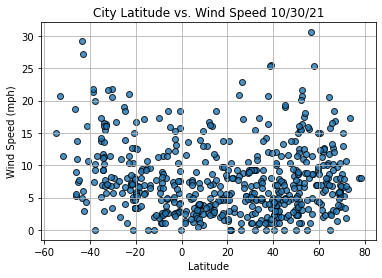

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Manokwari
Country                        ID
Date          2021-10-30 16:24:21
Lat                       -0.8667
Lng                      134.0833
Max Temp                    78.06
Humidity                       80
Cloudiness                     86
Wind Speed                   4.12
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-10-30 16:24:15,14.8961,-24.4956,80.82,71,91,11.27
2,Warud,IN,2021-10-30 16:24:16,21.4667,78.2667,67.75,55,99,5.68
4,San Quintin,MX,2021-10-30 16:24:17,30.4833,-115.9500,66.27,79,0,4.79
6,Albany,US,2021-10-30 16:21:46,42.6001,-73.9662,56.39,92,99,7.87
9,Jimeta,NG,2021-10-30 16:24:19,9.2833,12.4667,92.88,31,99,3.91


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

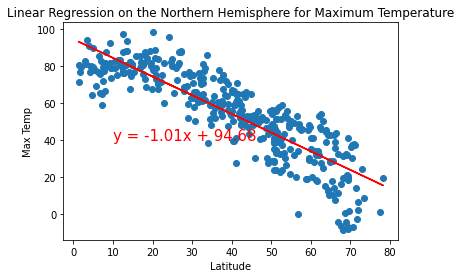

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

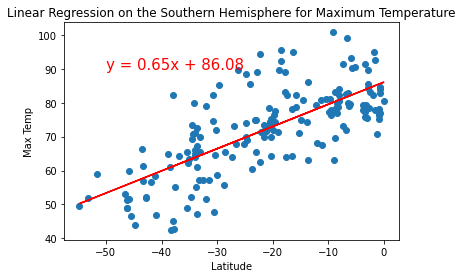

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


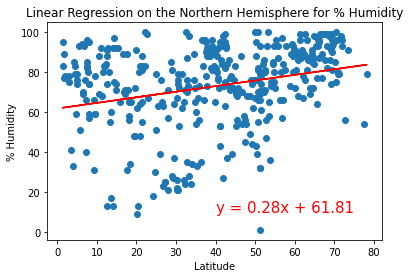

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

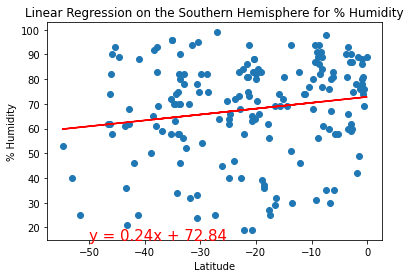

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

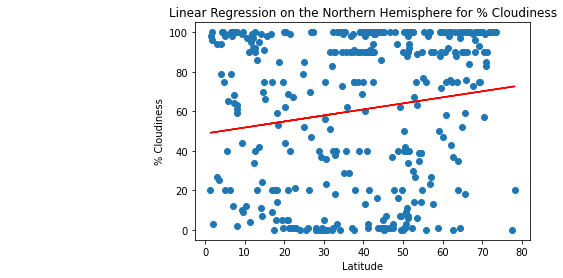

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

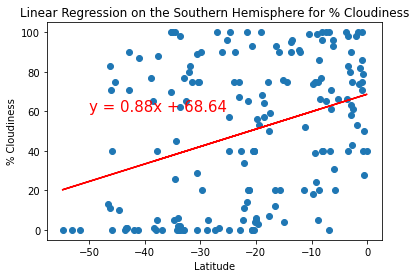

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

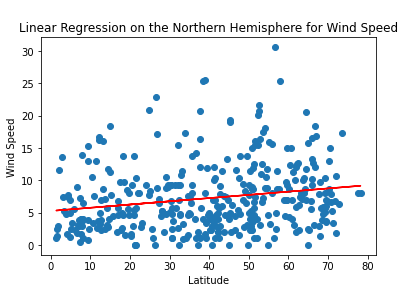

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

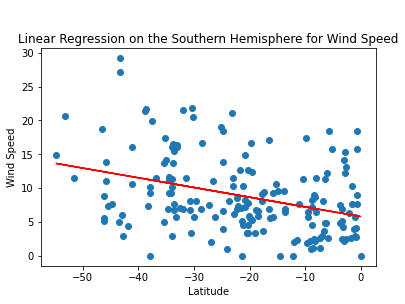

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))